# Self-Organizing Map - Wine data

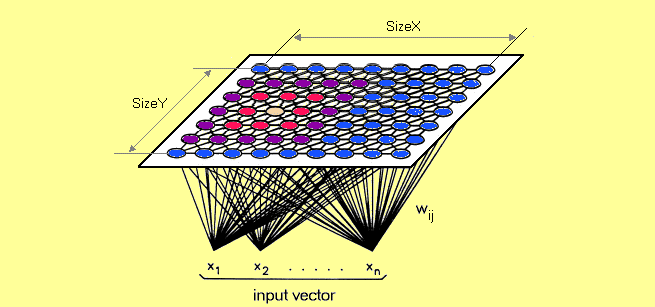

In [ ]:
pip install MiniSom

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import pcolor, colorbar, plot

In [ ]:
vinhos = pd.read_csv('../input/dataset-wine/wine.csv')
vinhos.head()

In [ ]:
x = vinhos.iloc[:,1:].values
y = vinhos.iloc[:,0].values

In [ ]:
normalizador = MinMaxScaler(feature_range=(0,1))
x = normalizador.fit_transform(x)

In [ ]:
som = MiniSom(x=8, y=8, input_len=13, sigma=1.0, learning_rate=0.5, random_seed=2)
som.random_weights_init(x)
som.train_random(data=x, num_iteration=100)

In [ ]:
som._weights
som._activation_map
q = som.activation_response(x)

In [ ]:
y[y==1] = 0
y[y==2] = 1
y[y==3] = 2

markers = ['o', 'D', 's']
color=['r', 'g', 'b']

In [ ]:
pcolor(som.distance_map().T)
colorbar()

for i, X in enumerate(x):
  w=som.winner(X)
  plot(w[0]+0.5, w[1]+0.5, markers[y[i]], markerfacecolor='None', markersize=10, markeredgecolor=color[y[i]], markeredgewidth=2)